In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine 
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [0]:
#Creating db file from csv
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

if not os.path.isfile('/content/drive/My Drive/Quora/train.db'):
    disk_engine = create_engine('sqlite:/content/drive/My Drive/Quora/train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

Mounted at /content/drive


In [0]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [0]:
read_db = '/content/drive/My Drive/Quora/train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [0]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 50001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [0]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [0]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.749981250468738,0.599988000239995,0.999975000624984,0.999975000624984,0.874989062636717,0.77776913589849,0.0,1.0,1.0,8.5,91,79,71,76,0.431372549019608,2,1,50,56,8,9,6.0,17.0,0.352941176470588,3,1,46.9850639104843,10.2652750015259,-23.8034961521625,107.669515881687,-13.14968085289,-27.6657136082649,-50.8349722400308,5.86383903026581,-2.17993575334549,29.7106821537018,18.3664309233427,-41.7257635593414,41.4238328635693,-28.2897208929062,...,-4.35372171550989,1.77146235480905,-18.4872964564711,15.6118155121803,16.4498501121998,-9.73399806022644,-4.13916063308716,6.68788370490074,-6.82148832827807,-0.42975814267993,2.51566483080387,-1.28605288267136,-3.13278611004353,-15.721988581121,-9.75828017760068,-22.6000073999166,-10.75928363204,7.55662805214524,6.99577195942402,9.80070896446705,-18.3845260888338,-2.95030063390732,6.98722758889198,-0.574649304151535,10.2470652461052,14.5376538038254,-9.17413979768753,11.3089301008731,-14.0069033578038,5.9224289348349,-1.03742249310017,12.636501044035,10.9842606186867,-1.86454270384274,4.97574653103948,-2.40449290722609,-2.46408168226481,-0.968670636415482,0.70079941675067,2.65861894935369
2,0.999966667777741,0.749981250468738,0.33332222259258,0.249993750156246,0.666655555740738,0.499993750078124,0.0,1.0,2.0,7.0,92,83,57,56,0.342857142857143,1,2,34,45,6,8,3.0,14.0,0.214285714285714,3,1,-81.6895170211792,93.2647604942322,-4.9108601808548,73.9082262516022,-75.5717358589172,13.7012476921082,-51.5259201675654,-23.1918449029326,25.0732563734055,-53.4027983099222,-48.9235775768757,-2.79260540008545,-2.99386620521545,-74.0313937664032,...,-9.93157488107681,-9.65523590147495,-7.17098378390074,10.2907012403011,28.9570785174146,-3.77492616325617,2.20521315932274,14.8924748897553,-15.0484985394869,9.87776482198387,-0.892606824636459,5.82629916071892,-1.69440293312073,-21.5463085472584,14.5123727470636,-17.7238426385447,-20.5136711001396,15.4890578687191,-9.72550739347935,13.1719799079001,-10.192786604166,-7.28239135444164,12.5020253956318,-5.73605117201805,22.9523705542088,5.24152428656817,-11.3318849494681,13.8705329075456,-21.1861456036568,1.60652629751712,-6.70377437677234,7.5594917088747,1.2512941583991,-15.2626666426659,5.14111401280388,5.14051648974419,-4.27520483720582,20.5537588596344,-6.22883271053433,12.0487342774868
3,0.874989062636717,0.874989062636717,0.999990909173553,0.999990909173553,0.818178099190458,0.818178099190458,1.0,1.0,0.0,22.0,97,95,96,95,0.913385826771654,5,2,125,124,21,21,17.0,36.0,0.472222222222222,7,3,-33.0521841049194,122.729422338307,132.087862491608,109.78337880969,-67.2324946820736,47.1508526206017,-78.6213213652372,-81.1908485591412,55.1319894790649,-77.4008198915981,-56.2287749201059,33.0859491229057,-18.6261243224144,-99.0059638619423,...,-31.2108064889908,13.1581837981939,-10.8492080569267,5.54945760965347,27.2533436380327,3.55614839121699,-5.15884520858526,30.8326181955636,-29.5340724289417,-0.247633088380098,-1.8687334023416,-9.78609864413738,-19.8218433307484,-12.3230462819338,-17.7072806349024,-23.7630188966286,-13.6819264199585,-18.813398219645,-6.06142596155405,1.63157917466015,-14.3968728333712,1.86937229707837,-19.8506989553571,-10.3110980521888,13.0415237601846,36.6670377254486,-23.4805845990777,4.96819691546261,-18.6227547377348,13.847371250391,-3.49549678899348,13.8152577980363,7.20097175985575,-0.0657446011900902,19.7447149157524,2.21668373048305,-36.4882532805204,14

<h2> 4.2 Converting strings to numerics </h2>

In [0]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [0]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [0]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6305142857142857 Class 1:  0.3694857142857143
---------- Distribution of output variable in train data ----------
Class 0:  0.3695 Class 1:  0.3695


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8859442307274985


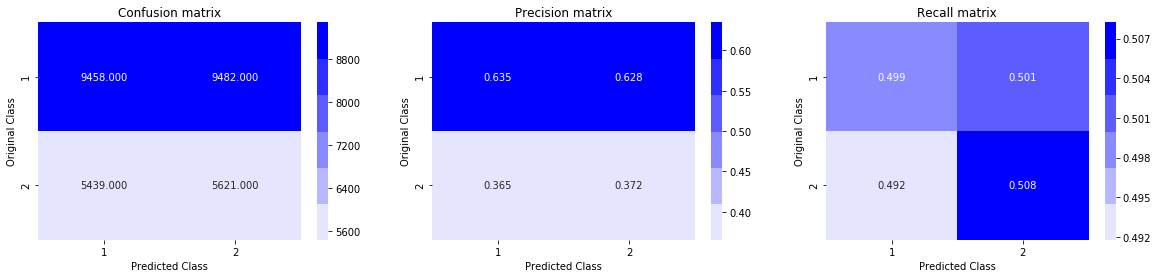

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4954697841223013
For values of alpha =  0.0001 The log loss is: 0.44561152923646585
For values of alpha =  0.001 The log loss is: 0.44394116103316555
For values of alpha =  0.01 The log loss is: 0.4430445338789973
For values of alpha =  0.1 The log loss is: 0.44817479281202466
For values of alpha =  1 The log loss is: 0.46538015575946534
For values of alpha =  10 The log loss is: 0.5068990154623283


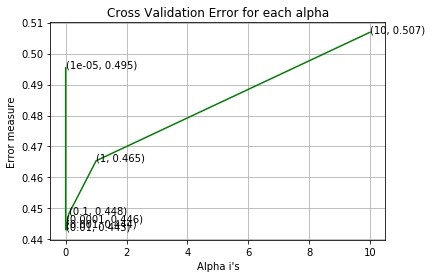

For values of best alpha =  0.01 The train log loss is: 0.4387095240209515
For values of best alpha =  0.01 The test log loss is: 0.4430445338789973
Total number of data points : 30000


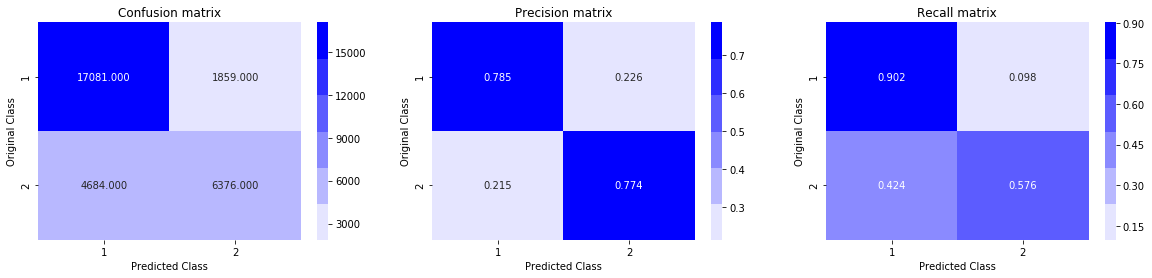

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


## Vectorizer Tf-IDF on Logistic regression and  Linear-SVM

In [0]:

if os.path.isfile('/content/drive/My Drive/Quora/nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/Quora/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
dfnlp.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
dfppro.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [0]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
## Merging the two frames
dfdata = pd.merge(df2, dfnlp, on='id')

In [0]:
dfdata.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
y_labels  = dfdata['is_duplicate']
dfdata  = dfdata.drop(['is_duplicate','id'], axis=1)

In [0]:
dfdata.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
dfdata.shape

(404290, 30)

In [0]:
cols = list(dfdata.columns)
for i in cols:
    if i == 'question1' or i  == 'question2':
      print("skipping ", i)
      continue
    dfdata[i] = dfdata[i].apply(pd.to_numeric)
    print(i)

freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
qid1
qid2
skipping  question1
skipping  question2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio


In [0]:
y_labels =pd.Series(y_labels)
y_labels = pd.to_numeric(y_labels)
y_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [0]:
X_train,X_test, y_train, y_test = train_test_split(dfdata, y_labels, stratify=y_labels, test_size=0.3)

In [0]:
X_train_question1  = X_train['question1']
X_train_question2 = X_train['question2']
X_train = X_train.drop(['question1'], axis=1)
X_train = X_train.drop(['question2'], axis=1)
X_train.head()


,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
389940,20,3,35,32,7,7,2.0,13.0,0.153846,23,17,122585,47949,0.999950,0.666644,0.666644,0.333328,0.571420,0.499994,0.0,1.0,1.0,7.5,74,61,58,61,0.176471
330015,20,23,49,28,8,6,4.0,14.0,0.285714,43,3,44269,12851,0.999967,0.749981,0.666644,0.399992,0.833319,0.555549,1.0,1.0,3.0,7.5,92,64,64,71,0.344828
136759,3,4,37,21,7,5,4.0,11.0,0.363636,7,1,218125,141091,0.999950,0.666644,0.666644,0.666644,0.799984,0.571420,0.0,1.0,2.0,6.0,89,73,57,81,0.454545
123117,1,1,24,31,4,5,3.0,9.0,0.333333,2,0,199129,199130,0.499975,0.499975,0.999950,0.666644,0.749981,0.599988,1.0,1.0,1.0,4.5,83,83,83,75,0.320000
7286,1,1,42,45,8,9,5.0,17.0,0.294118,2,0,14238,14239,0.999950,0.666644,0.499992,0.499992,0.624992,0.555549,0.0,1.0,1.0,8.5,83,73,80,83,0.651163


In [0]:
X_test_question1  = X_test['question1']
X_test_question2 = X_test['question2']
X_test = X_test.drop(['question1'], axis=1)
X_test = X_test.drop(['question2'], axis=1)
X_test.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
270455,1,1,51,90,6,13,0.0,19.0,0.000000,2,0,388344,388345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.0,10.5,35,35,33,41,0.096154
130730,6,19,76,48,16,9,5.0,23.0,0.217391,25,13,15672,31199,0.749981,0.499992,0.599988,0.374995,0.666659,0.374998,0.0,0.0,7.0,12.5,75,51,56,62,0.408163
221519,1,1,43,141,8,28,6.0,32.0,0.187500,2,0,328878,328879,0.749981,0.249998,0.749981,0.249998,0.749991,0.214285,0.0,0.0,20.0,18.0,83,42,41,65,0.477273
114146,9,1,52,59,10,9,2.0,19.0,0.105263,10,8,95439,86755,0.399992,0.399992,0.249994,0.166664,0.333330,0.272725,0.0,0.0,2.0,10.0,58,50,49,52,0.181818
327577,1,1,47,70,10,13,5.0,22.0,0.227273,2,0,454011,454012,0.499988,0.399992,0.666656,0.571420,0.599994,0.461535,0.0,1.0,3.0,11.5,65,57,56,57,0.291667


In [0]:
tfidf_question1 = TfidfVectorizer(lowercase=False, tokenizer= lambda x: x.split() )
tfidf_question2 = TfidfVectorizer(lowercase=False, tokenizer = lambda x: x.split())

In [0]:
# from sklearn.linear_model import LogisticRegression
# ##learning vocabulary for each questions seperately
# # tfidf_question1.fit(X_train_question1.values.astype('U'))
# # tfidf_question2.fit(X_train_question2.values.astype('U'))
# X_train['question1'] = tfidf_question1.fit_transform(X_train_question1.astype('U'))
# X_train['question2'] = tfidf_question2.fit_transform(X_train_question2.astype('U'))
# # data_for_model = data[['tf_idf_q1', 'tf_idf_q2', 'is_identical']]
# X_train = X_train.as_matrix()
# y_train = y_train.values.reshape(-1,1)
# # X_train.head()
# model = LogisticRegression()
# # print(X_train)
# # print(y_train)
# model.fit(X_train, y_train)

In [0]:
##learning vocabulary for each questions seperately
tfidf_question1.fit(X_train_question1.values.astype('U'))
tfidf_question2.fit(X_train_question2.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function <lambda> at 0x7f273e084ea0>, use_idf=True,
                vocabulary=None)

In [0]:
train_question1_vector = tfidf_question1.transform(X_train_question1.values.astype('U'))
train_question2_vector = tfidf_question2.transform(X_train_question2.values.astype('U'))

In [0]:
from scipy.sparse import coo_matrix
X_tr_tf_idf_question1_coo = coo_matrix(train_question1_vector)
X_tr_tf_idf_question2_coo = coo_matrix(train_question2_vector)
X_tr_len_coo = coo_matrix(X_train)

X_tr_combine = hstack([X_tr_tf_idf_question1_coo, X_tr_tf_idf_question2_coo, X_train]) 

In [0]:
test_question1_vector = tfidf_question1.transform(X_test_question1.values.astype('U'))
test_question2_vector = tfidf_question2.transform(X_test_question2.values.astype('U'))

In [0]:
X_test_tf_idf_question1_coo = coo_matrix(test_question1_vector)
X_test_tf_idf_question2_coo = coo_matrix(test_question2_vector)
X_test_len_coo = coo_matrix(X_test)
X_test_combine = hstack([X_test_tf_idf_question1_coo, X_test_tf_idf_question2_coo, X_test]) 

In [0]:
#normalization of data
from sklearn.preprocessing import Normalizer
# Create the Scaler object
# learning the pattern here 
transformer = Normalizer().fit(X_tr_combine)

In [0]:
# Fitting data on the scaler object
X_tr_standardized = transformer.transform(X_tr_combine)


In [0]:
X_test_standardized = transformer.transform(X_test_combine)

<h2>  Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.644464164815621
For values of alpha =  0.0001 The log loss is: 0.6452778115322944
For values of alpha =  0.001 The log loss is: 0.646864054146523
For values of alpha =  0.01 The log loss is: 0.6547645854240511
For values of alpha =  0.1 The log loss is: 0.6558053887268666
For values of alpha =  1 The log loss is: 0.6516765767146901
For values of alpha =  10 The log loss is: 0.6502294323058011


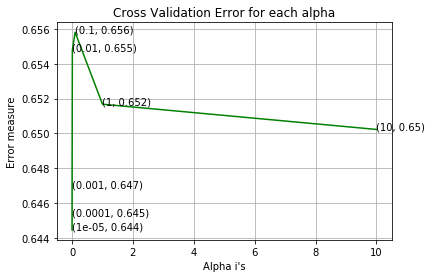

For values of best alpha =  1e-05 The train log loss is: 0.6442415076759773
For values of best alpha =  1e-05 The test log loss is: 0.644464164815621
Total number of data points : 121287


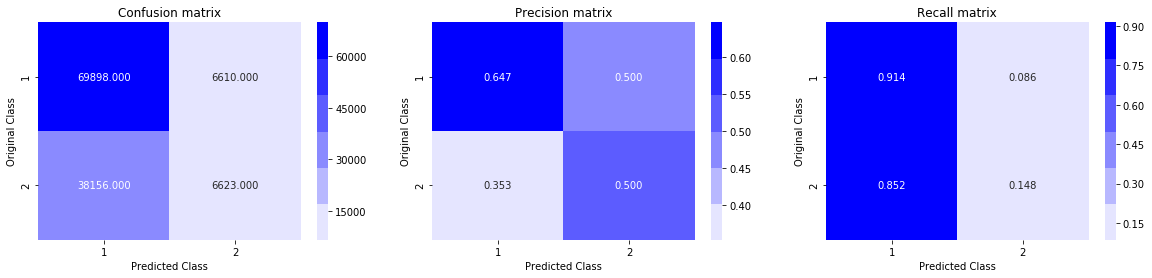

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
    clf.fit(X_tr_standardized, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr_standardized, y_train)
    predict_y = sig_clf.predict_proba(X_test_standardized)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42, class_weight='balanced')
clf.fit(X_tr_standardized, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr_standardized, y_train)

predict_y = sig_clf.predict_proba(X_tr_standardized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_standardized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6442617445738471
For values of alpha =  0.0001 The log loss is: 0.6448090347613671
For values of alpha =  0.001 The log loss is: 0.6512256972328877
For values of alpha =  0.01 The log loss is: 0.6574627091205082
For values of alpha =  0.1 The log loss is: 0.6585278256322605
For values of alpha =  1 The log loss is: 0.6585278256322539
For values of alpha =  10 The log loss is: 0.6585278256322646


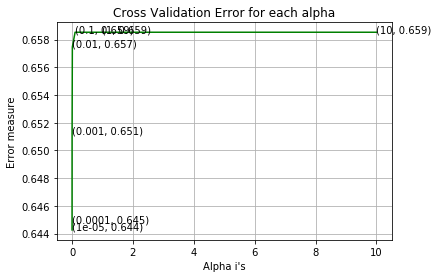

For values of best alpha =  1e-05 The train log loss is: 0.6440233078567243
For values of best alpha =  1e-05 The test log loss is: 0.6442617445738471
Total number of data points : 121287


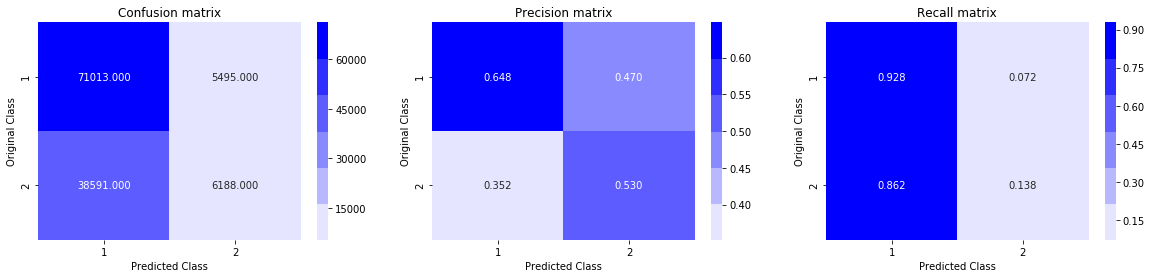

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42, class_weight='balanced')
    clf.fit(X_tr_standardized, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr_standardized, y_train)
    predict_y = sig_clf.predict_proba(X_test_standardized)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42, class_weight='balanced')
clf.fit(X_tr_standardized, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr_standardized, y_train)

predict_y = sig_clf.predict_proba(X_tr_standardized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_standardized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## XGBOOST with Hyperparameter Tuning

---



In [0]:
if os.path.isfile('/content/drive/My Drive/Quora/nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/Quora/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
dfnlp.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
dfppro.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [0]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
## Merging the two frames
dfdata = pd.merge(df2, dfnlp, on='id')

In [0]:
dfdata.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
print(dfdata.shape)
dfdata = dfdata.iloc[:50000,]
print("size of data",dfdata.shape)

(404290, 32)
size of data (50000, 32)


In [0]:
y_labels  = dfdata['is_duplicate']
dfdata  = dfdata.drop(['is_duplicate','id'], axis=1)

In [0]:
dfdata.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,qid1,qid2,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
dfdata.shape

(50000, 30)

In [0]:
X_intermediate,X_test, y_intermediate, y_test = train_test_split(dfdata, y_labels, stratify=y_labels, test_size=0.3)
X_train,X_cv, y_train, y_cv = train_test_split(X_intermediate, y_intermediate, stratify=y_intermediate, test_size=0.3)


In [0]:
X_train_question1 = X_train['question1']
#X_train = X_train.drop(['question1'], axis=1)
X_train_question2 = X_train['question2']
#X_train = X_train.drop(['question2'], axis=1)
##################################################
# X_cv_question1 = X_cv['question1']
# #X_cv = X_cv.drop(['question1'], axis=1)
# X_cv_question2 = X_cv['question2']
# #X_cv = X_cv.drop(['question2'], axis=1)
# ##################################################
# X_test_question1 = X_test['question1']
# #X_test = X_test.drop(['question1'], axis=1)
# X_test_question2 = X_test['question2']
# #X_test = X_test.drop(['question2'], axis=1)


In [0]:
tfidf_question1 = TfidfVectorizer(lowercase=False,tokenizer= lambda x: x.split() )
tfidf_question2 = TfidfVectorizer(lowercase=False,tokenizer= lambda x: x.split() )

tfidf_question1.fit_transform(X_train_question1.values.astype('U'))
tfidf_question2.fit_transform(X_train_question2.values.astype('U'))

# dict key:word and value:tf-idf score
word2tfidf_question1 = dict(zip(tfidf_question1.get_feature_names(), tfidf_question1.idf_))
word2tfidf_question2 = dict(zip(tfidf_question2.get_feature_names(), tfidf_question2.idf_))

In [0]:
X_train['question1'] = X_train['question1'].apply(lambda x: str(x))
X_train['question2'] = X_train['question2'].apply(lambda x: str(x))

In [0]:
X_cv['question1'] = X_cv['question1'].apply(lambda x: str(x))
X_cv['question2'] = X_cv['question2'].apply(lambda x: str(x))

In [0]:
X_test['question1'] = X_test['question1'].apply(lambda x: str(x))
X_test['question2'] = X_test['question2'].apply(lambda x: str(x))

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
import spacy
from tqdm import tqdm

import en_core_web_sm
nlp = en_core_web_sm.load()
# en_vectors_web_lg, which includes over 1 million unique vectors.
# nlp = spacy.load('/home/dinesh/anaconda3/lib/python3.6/site-packages/en_core_web_sm')
            


In [0]:

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        try:
            idf = word2tfidf_question1[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)



100%|██████████| 24500/24500 [04:49<00:00, 84.78it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(X_train['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_question2[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

100%|██████████| 24500/24500 [04:48<00:00, 83.61it/s]


In [0]:

vecs1 = []
for qu1 in tqdm(list(X_cv['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_question1[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_cv['q1_feats_m'] = list(vecs1)



100%|██████████| 10500/10500 [02:01<00:00, 86.25it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(X_cv['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_question2[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_cv['q2_feats_m'] = list(vecs2)

100%|██████████| 10500/10500 [02:03<00:00, 85.01it/s]


In [0]:

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_question1[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)



100%|██████████| 15000/15000 [02:55<00:00, 85.35it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(X_test['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_question2[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

100%|██████████| 15000/15000 [02:55<00:00, 85.42it/s]


In [0]:
X_train_question1_list = X_train.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q2_feats_m'],axis=1)

X_train_question1_tfidfw2v_df= pd.DataFrame(X_train_question1_list.q1_feats_m.values.tolist(), index= X_train_question1_list.index)

In [0]:
X_train_question1_tfidfw2v_df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [0]:
X_train_question1_tfidfw2v_df.columns = [ 'x_0', 'x_1', 'x_2', 'x_ 3', 'x_ 4', 'x_ 5', 'x_ 6', 'x_ 7', 'x_ 8', 'x_ 9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95']

In [0]:
X_train_question1_tfidfw2v_df.columns.values

array(['x_0', 'x_1', 'x_2', 'x_ 3', 'x_ 4', 'x_ 5', 'x_ 6', 'x_ 7',
       'x_ 8', 'x_ 9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15',
       'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23',
       'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31',
       'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39',
       'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47',
       'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55',
       'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63',
       'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71',
       'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79',
       'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87',
       'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95'],
      dtype=object)

In [0]:
X_train_question1_tfidfw2v_df.head(2)

,x_0,x_1,x_2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,...,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
20146,-3.122269,-7.445390,-39.500152,-97.033885,6.702324,46.899795,33.980766,49.316833,28.709726,46.344263,36.074777,50.414437,-93.205690,-61.530937,-51.472347,53.046652,-11.083360,24.931185,62.412325,59.148060,-82.648294,-7.351159,20.257406,85.853408,5.340126,43.616986,64.287959,-28.434181,-34.948533,93.505121,-18.033334,66.10969,-94.577130,8.089052,40.034193,55.554424,-43.760317,43.376927,-63.397428,29.762861,...,10.690520,25.206842,-70.717979,11.260733,-64.884084,-24.174086,2.522704,-66.061636,-2.489062,19.312593,67.615377,-9.501813,-71.321876,26.145643,-22.858746,-11.238185,-16.730197,65.668856,33.979358,87.816650,51.217868,-19.772480,-5.331427,3.232221,-34.214060,-66.946734,-33.800799,22.087537,28.331876,-63.910245,134.418572,29.832193,47.967260,-11.548530,20.190454,10.329246,-47.251227,-7.429818,-44.102556,59.014364
40455,88.244623,-79.987081,-19.675600,-76.350362,-7.984235,15.252042,126.434437,17.256015,-28.597171,81.006163,16.045875,49.719863,-124.511382,-72.880312,12.863879,-28.216735,85.075025,48.517513,123.184088,99.687172,-78.849299,-105.914032,20.653425,216.598858,122.660937,10.128249,44.477055,-73.740224,24.769975,151.718536,82.238268,-27.88647,-72.113475,-81.734169,69.258435,35.317859,9.196467,65.506301,-49.983058,84.431295,...,29.345287,65.904253,-35.512776,29.702473,-131.193086,-84.225401,85.283783,-82.889322,-47.152382,60.357045,-17.281548,36.965759,-104.691344,49.045679,50.785478,-8.910567,220.577013,113.630538,82.314475,51.449698,27.450963,-64.134143,-62.191895,-102.583713,-88.348923,-13.157591,-134.062607,32.947486,-3.862992,-15.449591,74.754665,-79.649523,83.195016,-50.351908,-18.405038,24.238708,-90.622646,26.859884,-6.597258,25.408809


In [0]:
X_train_question2_list = X_train.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q1_feats_m'],axis=1)

X_train_question2_tfidfw2v_df= pd.DataFrame(X_train_question2_list.q2_feats_m.values.tolist(), index= X_train_question2_list.index)


X_train_question2_tfidfw2v_df.columns = [ 'y_0', 'y_1', 'y_2', 'y_ 3', 'y_ 4', 'y_ 5', 'y_ 6', 'y_ 7', 'y_ 8', 'y_ 9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', 'y_50', 'y_51', 'y_52', 'y_53', 'y_54', 'y_55', 'y_56', 'y_57', 'y_58', 'y_59', 'y_60', 'y_61', 'y_62', 'y_63', 'y_64', 'y_65', 'y_66', 'y_67', 'y_68', 'y_69', 'y_70', 'y_71', 'y_72', 'y_73', 'y_74', 'y_75', 'y_76', 'y_77', 'y_78', 'y_79', 'y_80', 'y_81', 'y_82', 'y_83', 'y_84', 'y_85', 'y_86', 'y_87', 'y_88', 'y_89', 'y_90', 'y_91', 'y_92', 'y_93', 'y_94', 'y_95']


X_train_question2_tfidfw2v_df.head(2)

,y_0,y_1,y_2,y_ 3,y_ 4,y_ 5,y_ 6,y_ 7,y_ 8,y_ 9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,...,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_68,y_69,y_70,y_71,y_72,y_73,y_74,y_75,y_76,y_77,y_78,y_79,y_80,y_81,y_82,y_83,y_84,y_85,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
20146,67.425554,-6.338680,-82.799849,-68.121912,-15.002559,36.229819,161.695273,99.419056,3.011423,99.937055,-13.025193,25.208359,-67.171499,-93.946406,-60.651298,22.387920,-64.015947,52.045855,34.526533,31.859406,-94.494401,-57.844226,4.472264,94.587994,140.795015,78.026332,88.724339,-28.250340,61.385834,156.052725,46.279166,-35.548773,-63.553475,54.323234,92.009101,45.582578,51.934704,121.504940,-52.005737,76.838394,...,-41.294683,72.648720,-87.026748,-2.302521,-35.812653,9.331318,44.103171,8.456374,3.935051,118.073568,7.903610,11.003350,-83.119467,-64.711601,19.961984,-5.920633,80.115636,52.647680,-24.547820,15.885856,17.249701,-27.577821,-57.191396,5.53722,-65.003595,-134.204953,-97.003821,134.876849,-23.463189,-113.994567,86.599999,-37.158281,78.903923,-47.195803,30.304887,-22.584355,-95.579035,11.595441,-7.035303,-61.293280
40455,27.016951,-40.791211,-9.252091,-59.211679,6.001429,23.323863,21.138620,-12.106679,3.348925,55.601718,15.551510,18.752036,-61.734971,-20.853582,35.804239,-5.245245,28.295003,48.464799,70.229605,49.813926,-59.511882,-57.324533,58.543519,67.588507,29.720288,36.425167,46.495402,-10.118538,-55.007352,67.016232,35.773544,46.428318,-50.503742,-4.777802,18.426997,-15.542076,-65.370458,72.569583,-18.504760,34.423017,...,38.822223,55.642065,-23.579714,22.594750,-45.320529,-64.846493,40.962726,-26.569132,-14.061925,38.083125,-13.971059,50.519938,-71.405257,12.729352,24.226272,21.098291,103.082999,75.483756,38.306427,84.692619,40.433352,-46.946821,-91.511280,-31.11301,-47.871320,-3.452507,-73.948339,38.738943,23.325102,-6.490831,65.474813,-66.849692,98.503145,-18.129876,-13.274777,12.593689,-29.357836,-29.737041,-12.867091,17.027057


In [0]:
X_cv_question1_list = X_cv.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q2_feats_m'],axis=1)

X_cv_question1_tfidfw2v_df= pd.DataFrame(X_cv_question1_list.q1_feats_m.values.tolist(), index= X_cv_question1_list.index)


X_cv_question1_tfidfw2v_df.columns = [ 'x_0', 'x_1', 'x_2', 'x_ 3', 'x_ 4', 'x_ 5', 'x_ 6', 'x_ 7', 'x_ 8', 'x_ 9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95']


X_cv_question1_tfidfw2v_df.head(2)

,x_0,x_1,x_2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,...,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
4826,49.284778,22.012691,16.113902,-47.160028,-20.182465,-2.164403,35.084703,32.010500,-58.556655,54.470493,17.459519,-20.524646,-53.252194,-31.245679,-43.432082,-14.782871,-15.822594,-9.863174,52.299774,18.153407,-65.238541,0.614572,-7.933660,-16.283695,19.200653,27.589774,20.217899,13.964622,-23.149045,22.743846,46.469445,-32.442555,-59.325804,44.129311,48.017703,-23.193400,-17.048303,60.313373,29.655643,3.201108,...,-41.898901,53.196672,-17.556973,13.129695,-8.494175,3.714927,78.556692,-3.738066,-0.994029,95.439738,-3.838762,54.835575,12.292008,-16.908951,4.048359,-6.874871,0.983878,6.182932,-6.902471,24.374949,35.227524,-32.498061,-38.922089,-28.612692,-48.524647,-29.257691,-51.211684,42.934285,15.623725,-47.407317,17.388823,14.997725,47.683477,44.836870,-8.265136,-10.275129,29.328356,38.416813,-0.999092,-13.514254
47296,77.535670,-56.674952,-172.135887,-212.101726,-51.794033,107.603601,311.074763,273.423287,83.872679,119.895509,-15.172627,103.544420,-253.507115,-69.232345,16.655506,-71.774790,47.470482,69.736491,82.970918,192.698115,-160.844249,41.258401,178.644564,187.421713,-4.518441,115.904136,194.839308,-116.881975,-62.884275,145.999218,129.603518,-1.119309,-244.195033,34.041901,127.596362,58.469795,-77.133214,74.676785,-136.806956,106.232827,...,-188.020130,6.026409,-232.538374,164.320780,-72.438038,-83.952050,19.316098,-120.009118,-128.205000,79.590742,-84.894470,82.352520,-134.214142,92.262499,85.378656,-189.377802,-51.124607,160.215597,88.486259,210.091309,68.783014,-105.686434,-65.201480,-10.892246,73.784539,-302.028664,-118.772275,120.541131,51.588406,-84.028629,193.197248,-158.822304,33.642684,98.439038,-21.966829,122.903118,62.630175,75.767192,-147.709210,57.955243


In [0]:
X_cv_question2_list = X_cv.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q1_feats_m'],axis=1)

X_cv_question2_tfidfw2v_df= pd.DataFrame(X_cv_question2_list.q2_feats_m.values.tolist(), index= X_cv_question2_list.index)


X_cv_question2_tfidfw2v_df.columns = [ 'y_0', 'y_1', 'y_2', 'y_ 3', 'y_ 4', 'y_ 5', 'y_ 6', 'y_ 7', 'y_ 8', 'y_ 9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', 'y_50', 'y_51', 'y_52', 'y_53', 'y_54', 'y_55', 'y_56', 'y_57', 'y_58', 'y_59', 'y_60', 'y_61', 'y_62', 'y_63', 'y_64', 'y_65', 'y_66', 'y_67', 'y_68', 'y_69', 'y_70', 'y_71', 'y_72', 'y_73', 'y_74', 'y_75', 'y_76', 'y_77', 'y_78', 'y_79', 'y_80', 'y_81', 'y_82', 'y_83', 'y_84', 'y_85', 'y_86', 'y_87', 'y_88', 'y_89', 'y_90', 'y_91', 'y_92', 'y_93', 'y_94', 'y_95']


X_cv_question2_tfidfw2v_df.head(2)

,y_0,y_1,y_2,y_ 3,y_ 4,y_ 5,y_ 6,y_ 7,y_ 8,y_ 9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,...,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_68,y_69,y_70,y_71,y_72,y_73,y_74,y_75,y_76,y_77,y_78,y_79,y_80,y_81,y_82,y_83,y_84,y_85,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
4826,42.117736,-95.558664,-120.385656,-179.316990,-2.806886,24.496654,245.876484,-3.555349,-10.564818,66.370698,15.348575,48.328542,-63.852918,-48.625887,-12.416065,-4.979615,95.242384,-12.533449,137.632095,106.447529,23.839383,-80.593903,21.839252,111.706439,106.871327,97.301296,123.098496,-50.388041,49.287772,135.445168,27.977185,-85.836200,-69.641304,3.531368,21.542122,-15.420558,72.451231,24.425053,-21.425265,98.217435,...,-41.661360,38.552747,-114.364566,-44.741888,-56.768316,-85.980452,32.181440,-77.212961,-45.433472,83.326000,40.970268,-11.254516,-64.641900,25.756317,41.944454,24.877161,119.958139,53.973584,117.806116,46.01392,58.311873,8.240709,-2.033032,-48.942839,-143.037450,-51.235254,-79.536303,81.834675,6.080745,-3.312320,9.946913,30.663404,75.652944,-16.736652,-70.194383,94.642577,-125.007045,-39.03808,-50.980894,46.710582
47296,13.579585,-76.383738,-91.040638,-87.588051,-14.190394,67.706825,135.823760,29.467913,3.401869,65.404107,39.774434,110.448406,-45.893595,-37.716420,-33.393700,12.980181,-25.446749,8.668837,24.434657,81.668185,-26.881087,-25.650130,36.611490,59.300380,57.750895,78.884137,49.069884,-59.195182,44.270938,160.656226,-27.477412,-21.832051,-49.809046,-47.307183,46.556418,27.720098,-7.467977,77.549787,-93.273594,74.298562,...,-20.063148,39.171221,-84.616364,-9.887242,-102.096229,-40.090023,40.536218,0.406190,25.160372,72.332707,9.738949,-27.645023,-58.946401,-35.888594,27.936905,20.904810,68.978499,12.666584,62.312863,-7.77516,41.645500,-54.614493,-24.350563,-35.414229,-73.013843,-106.036871,2.088600,95.850536,-3.392542,-16.914144,111.137155,-7.440586,8.516002,34.814907,-21.342260,51.294991,-67.272551,8.59004,-49.227584,3.253797


In [0]:
X_test_question1_list = X_test.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q2_feats_m'],axis=1)

X_test_question1_tfidfw2v_df= pd.DataFrame(X_test_question1_list.q1_feats_m.values.tolist(), index= X_test_question1_list.index)


X_test_question1_tfidfw2v_df.columns = [ 'x_0', 'x_1', 'x_2', 'x_ 3', 'x_ 4', 'x_ 5', 'x_ 6', 'x_ 7', 'x_ 8', 'x_ 9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95']


X_test_question1_tfidfw2v_df.head(2)

,x_0,x_1,x_2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,...,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
9682,52.928271,-41.795635,19.508566,-1.244279,-10.439107,21.665400,0.557499,-43.096533,-8.019584,23.924667,32.774059,-18.726392,-31.867889,-48.421109,-18.646771,-15.429029,-10.581448,1.696577,21.769791,-10.009072,-55.943397,-38.945423,56.669437,13.585668,-8.314097,15.921793,1.129167,-20.894788,-23.748986,57.721228,-24.783677,5.420699,-60.096064,60.225655,2.772868,39.894752,56.182015,34.480624,-23.307646,7.958504,...,65.192012,-4.893849,-29.748797,66.815739,3.055059,-0.399277,9.962431,-9.953909,20.497036,26.088299,-2.916749,11.425545,-1.011621,23.372015,-35.989264,-45.081944,-44.280171,33.003787,-10.245176,52.162735,-20.434263,7.732498,-9.818468,-18.811668,16.917329,7.714178,-12.111298,18.319573,11.209871,-26.451559,-10.255209,-20.441305,37.018392,32.550649,-0.325682,-3.540136,26.383833,-15.710187,16.296023,12.718349
44087,23.859627,-24.481016,-24.218617,-38.925124,-25.735355,-31.517222,28.070401,-23.000465,16.197278,106.386362,-36.568143,-17.180140,5.845167,19.322966,7.039669,-9.466601,-5.738268,-22.617444,16.038578,75.543909,-70.681363,-29.588243,12.016822,102.013634,109.325757,46.528897,95.098255,76.622272,27.410562,64.963103,130.633425,-117.754771,-93.107042,18.876935,-41.736207,110.129767,23.409980,33.418383,-86.418339,46.474087,...,-72.525543,-17.977753,-26.111960,-17.363446,-3.525653,-53.854307,69.758600,-87.769649,-63.918395,-10.416174,4.257253,115.127760,-39.506343,83.170185,-4.730776,-3.515626,130.769114,72.748064,-22.503151,36.844689,26.658043,9.563741,21.864674,-13.090247,-31.666828,21.823061,-110.372913,27.797750,-51.367525,-61.214462,35.421531,-18.745973,85.052044,-18.047024,23.352496,22.988566,-22.831019,-20.406270,-8.143446,30.683649


In [0]:
X_test_question2_list = X_test.drop(['freq_qid1','word_Common','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Total','word_share','freq_q1+q2','freq_q1-q2','qid1','qid2','question1','question2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','q1_feats_m'],axis=1)

X_test_question2_tfidfw2v_df= pd.DataFrame(X_test_question2_list.q2_feats_m.values.tolist(), index= X_test_question2_list.index)

X_test_question2_tfidfw2v_df.columns = [ 'y_0', 'y_1', 'y_2', 'y_ 3', 'y_ 4', 'y_ 5', 'y_ 6', 'y_ 7', 'y_ 8', 'y_ 9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', 'y_50', 'y_51', 'y_52', 'y_53', 'y_54', 'y_55', 'y_56', 'y_57', 'y_58', 'y_59', 'y_60', 'y_61', 'y_62', 'y_63', 'y_64', 'y_65', 'y_66', 'y_67', 'y_68', 'y_69', 'y_70', 'y_71', 'y_72', 'y_73', 'y_74', 'y_75', 'y_76', 'y_77', 'y_78', 'y_79', 'y_80', 'y_81', 'y_82', 'y_83', 'y_84', 'y_85', 'y_86', 'y_87', 'y_88', 'y_89', 'y_90', 'y_91', 'y_92', 'y_93', 'y_94', 'y_95']

X_test_question2_tfidfw2v_df.columns.values

X_test_question2_tfidfw2v_df.head(2)

,y_0,y_1,y_2,y_ 3,y_ 4,y_ 5,y_ 6,y_ 7,y_ 8,y_ 9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,...,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_68,y_69,y_70,y_71,y_72,y_73,y_74,y_75,y_76,y_77,y_78,y_79,y_80,y_81,y_82,y_83,y_84,y_85,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
9682,90.580601,-65.310161,20.215004,-18.025074,-15.059992,-7.912553,14.874816,-36.017987,-12.445316,46.623560,3.210336,-30.805742,-34.539113,-42.799913,-32.027412,-6.290378,2.983101,5.825927,29.196875,-5.113157,-37.190428,-50.069738,70.048928,41.440262,-18.914536,12.421844,11.686569,-41.628195,-14.743690,74.456704,-43.794732,-0.176241,-57.125589,61.564152,37.056308,30.520645,8.700670,31.134214,-15.554662,27.761924,...,58.594807,-28.888643,-43.148644,62.653413,-21.646238,-24.600142,27.255801,-2.744765,19.608621,23.660650,-24.840243,18.507960,-1.446514,46.449835,-26.193085,-36.503899,-35.917204,44.228349,-4.061509,66.594233,5.213939,20.573856,-31.535527,-41.070971,1.901913,4.207562,9.109528,27.052641,29.220926,0.451389,-19.094998,-12.878992,44.883280,26.974517,-0.988065,-11.383522,14.114008,3.033357,-23.913964,38.501635
44087,105.113351,-160.677885,55.415261,-85.257646,-13.105207,-17.709045,150.230180,-58.460859,-39.402963,39.444011,-24.497759,-55.788038,2.328203,-40.373100,35.079880,-63.679397,21.793861,42.558682,36.361642,144.800906,-74.172261,-92.836817,48.910665,204.903276,135.669056,73.129356,182.701733,-20.984120,91.733204,171.499438,174.082177,-67.353189,-98.510790,-48.286806,80.553972,136.471211,-4.449009,83.548444,-135.535583,133.605085,...,-46.174695,-40.029751,-31.666072,-6.641162,-130.777390,-136.577685,124.686144,-102.325706,-88.835110,5.678945,-70.124509,85.265953,-131.363972,203.267028,44.648570,-65.460577,195.812042,101.083604,53.549323,80.319992,41.206920,-24.996946,-54.437040,-95.456485,-42.420647,-40.393248,-32.380544,81.436293,-98.812260,-94.591307,26.466280,-91.301046,142.707925,-25.836338,18.036751,-16.529844,-119.720561,-17.346879,-73.695964,79.265029


In [0]:
### Drop questions in the train, cv and test data
X_train.columns.values
X_train_without_questions = X_train.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)
X_cv_without_questions = X_cv.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)
X_test_without_questions = X_test.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)

In [0]:
cols = list(X_train_without_questions.columns)
for i in cols:
    X_train_without_questions[i] = X_train_without_questions[i].apply(pd.to_numeric)
    print(i)

freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
qid1
qid2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio


In [0]:
cols = list(X_cv_without_questions.columns)
for i in cols:
    X_cv_without_questions[i] = X_cv_without_questions[i].apply(pd.to_numeric)
    print(i)

freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
qid1
qid2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio


In [0]:
cols = list(X_test_without_questions.columns)
for i in cols:
    X_test_without_questions[i] = X_test_without_questions[i].apply(pd.to_numeric)
    print(i)

freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
qid1
qid2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio


In [0]:
cols = list(X_train_question1_tfidfw2v_df.columns)
for i in cols:
    X_train_question1_tfidfw2v_df[i] = X_train_question1_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)
    
    
cols = list(X_train_question2_tfidfw2v_df.columns)
for i in cols:
    X_train_question2_tfidfw2v_df[i] = X_train_question2_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)

x_0
x_1
x_2
x_ 3
x_ 4
x_ 5
x_ 6
x_ 7
x_ 8
x_ 9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
x_21
x_22
x_23
x_24
x_25
x_26
x_27
x_28
x_29
x_30
x_31
x_32
x_33
x_34
x_35
x_36
x_37
x_38
x_39
x_40
x_41
x_42
x_43
x_44
x_45
x_46
x_47
x_48
x_49
x_50
x_51
x_52
x_53
x_54
x_55
x_56
x_57
x_58
x_59
x_60
x_61
x_62
x_63
x_64
x_65
x_66
x_67
x_68
x_69
x_70
x_71
x_72
x_73
x_74
x_75
x_76
x_77
x_78
x_79
x_80
x_81
x_82
x_83
x_84
x_85
x_86
x_87
x_88
x_89
x_90
x_91
x_92
x_93
x_94
x_95
y_0
y_1
y_2
y_ 3
y_ 4
y_ 5
y_ 6
y_ 7
y_ 8
y_ 9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
y_21
y_22
y_23
y_24
y_25
y_26
y_27
y_28
y_29
y_30
y_31
y_32
y_33
y_34
y_35
y_36
y_37
y_38
y_39
y_40
y_41
y_42
y_43
y_44
y_45
y_46
y_47
y_48
y_49
y_50
y_51
y_52
y_53
y_54
y_55
y_56
y_57
y_58
y_59
y_60
y_61
y_62
y_63
y_64
y_65
y_66
y_67
y_68
y_69
y_70
y_71
y_72
y_73
y_74
y_75
y_76
y_77
y_78
y_79
y_80
y_81
y_82
y_83
y_84
y_85
y_86
y_87
y_88
y_89
y_90
y_91
y_92
y_93
y_94
y_95


In [0]:
cols = list(X_cv_question1_tfidfw2v_df.columns)
for i in cols:
    X_cv_question1_tfidfw2v_df[i] = X_cv_question1_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)
    
    
cols = list(X_cv_question2_tfidfw2v_df.columns)
for i in cols:
    X_cv_question2_tfidfw2v_df[i] = X_cv_question2_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)

x_0
x_1
x_2
x_ 3
x_ 4
x_ 5
x_ 6
x_ 7
x_ 8
x_ 9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
x_21
x_22
x_23
x_24
x_25
x_26
x_27
x_28
x_29
x_30
x_31
x_32
x_33
x_34
x_35
x_36
x_37
x_38
x_39
x_40
x_41
x_42
x_43
x_44
x_45
x_46
x_47
x_48
x_49
x_50
x_51
x_52
x_53
x_54
x_55
x_56
x_57
x_58
x_59
x_60
x_61
x_62
x_63
x_64
x_65
x_66
x_67
x_68
x_69
x_70
x_71
x_72
x_73
x_74
x_75
x_76
x_77
x_78
x_79
x_80
x_81
x_82
x_83
x_84
x_85
x_86
x_87
x_88
x_89
x_90
x_91
x_92
x_93
x_94
x_95
y_0
y_1
y_2
y_ 3
y_ 4
y_ 5
y_ 6
y_ 7
y_ 8
y_ 9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
y_21
y_22
y_23
y_24
y_25
y_26
y_27
y_28
y_29
y_30
y_31
y_32
y_33
y_34
y_35
y_36
y_37
y_38
y_39
y_40
y_41
y_42
y_43
y_44
y_45
y_46
y_47
y_48
y_49
y_50
y_51
y_52
y_53
y_54
y_55
y_56
y_57
y_58
y_59
y_60
y_61
y_62
y_63
y_64
y_65
y_66
y_67
y_68
y_69
y_70
y_71
y_72
y_73
y_74
y_75
y_76
y_77
y_78
y_79
y_80
y_81
y_82
y_83
y_84
y_85
y_86
y_87
y_88
y_89
y_90
y_91
y_92
y_93
y_94
y_95


In [0]:
cols = list(X_test_question1_tfidfw2v_df.columns)
for i in cols:
    X_test_question1_tfidfw2v_df[i] = X_test_question1_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)
    
    
cols = list(X_test_question2_tfidfw2v_df.columns)
for i in cols:
    X_test_question2_tfidfw2v_df[i] = X_test_question2_tfidfw2v_df[i].apply(pd.to_numeric)
    print(i)

x_0
x_1
x_2
x_ 3
x_ 4
x_ 5
x_ 6
x_ 7
x_ 8
x_ 9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
x_21
x_22
x_23
x_24
x_25
x_26
x_27
x_28
x_29
x_30
x_31
x_32
x_33
x_34
x_35
x_36
x_37
x_38
x_39
x_40
x_41
x_42
x_43
x_44
x_45
x_46
x_47
x_48
x_49
x_50
x_51
x_52
x_53
x_54
x_55
x_56
x_57
x_58
x_59
x_60
x_61
x_62
x_63
x_64
x_65
x_66
x_67
x_68
x_69
x_70
x_71
x_72
x_73
x_74
x_75
x_76
x_77
x_78
x_79
x_80
x_81
x_82
x_83
x_84
x_85
x_86
x_87
x_88
x_89
x_90
x_91
x_92
x_93
x_94
x_95
y_0
y_1
y_2
y_ 3
y_ 4
y_ 5
y_ 6
y_ 7
y_ 8
y_ 9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
y_21
y_22
y_23
y_24
y_25
y_26
y_27
y_28
y_29
y_30
y_31
y_32
y_33
y_34
y_35
y_36
y_37
y_38
y_39
y_40
y_41
y_42
y_43
y_44
y_45
y_46
y_47
y_48
y_49
y_50
y_51
y_52
y_53
y_54
y_55
y_56
y_57
y_58
y_59
y_60
y_61
y_62
y_63
y_64
y_65
y_66
y_67
y_68
y_69
y_70
y_71
y_72
y_73
y_74
y_75
y_76
y_77
y_78
y_79
y_80
y_81
y_82
y_83
y_84
y_85
y_86
y_87
y_88
y_89
y_90
y_91
y_92
y_93
y_94
y_95


In [0]:
X_train = hstack([X_train_without_questions, X_train_question1_tfidfw2v_df, X_train_question2_tfidfw2v_df])

In [0]:
X_cv = hstack([X_cv_without_questions, X_cv_question1_tfidfw2v_df, X_cv_question2_tfidfw2v_df])

In [0]:
X_test = hstack([X_test_without_questions, X_test_question1_tfidfw2v_df, X_test_question2_tfidfw2v_df])

In [0]:
#normalization of data
from sklearn.preprocessing import Normalizer
# Create the Scaler object
# learning the pattern here 
transformer = Normalizer().fit(X_train)

In [0]:

## standardizing the data
X_train = transformer.transform(X_train)
X_cv = transformer.transform(X_cv)
X_test = transformer.transform(X_test)




In [0]:
# X_train_question1_tfidfw2v_df['word_Common'] = X_train['word_Common']
# X_train_question2_tfidfw2v_df['word_Common'] = X_train['word_Common']
# ############
# X_cv_question1_tfidfw2v_df['word_Common'] = X_cv['word_Common']
# X_cv_question2_tfidfw2v_df['word_Common'] = X_cv['word_Common']
# ############
# X_test_question1_tfidfw2v_df['word_Common'] = X_test['word_Common']
# X_test_question2_tfidfw2v_df['word_Common'] = X_test['word_Common']
# X_test_question1_tfidfw2v_df.head(2)

In [0]:
y_train = list(map(int, y_train.values))
y_cv = list(map(int, y_cv.values))
y_test = list(map(int, y_test.values))

In [0]:
import xgboost as xgb
start = 2 
train_logloss = []
cv_logloss  = []
index = []
while (start < 12):
  params = {}
  params['objective'] = 'binary:logistic'
  params['eval_metric'] = 'logloss'
  params['eta'] = 0.02
  params['max_depth'] = start

  d_train = xgb.DMatrix(X_train, label=y_train)
  d_cv = xgb.DMatrix(X_cv, label=y_cv)

  watchlist = [(d_train, 'train'), (d_cv, 'valid')]

  bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=5, verbose_eval=10)

  xgdmat = xgb.DMatrix(X_train,y_train)
  predict_y = bst.predict(d_cv)
  temp  = log_loss(y_cv, predict_y, eps=1e-15)
  cv_logloss.append(temp)
  predict_y = bst.predict(d_train)
  temp  = log_loss(y_train, predict_y, eps=1e-15)
  train_logloss.append(temp)
  index.append(start)
  start+=2

[0]	train-logloss:0.688502	valid-logloss:0.688446
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 5 rounds.
[10]	train-logloss:0.650131	valid-logloss:0.649523
[20]	train-logloss:0.62193	valid-logloss:0.620888
[30]	train-logloss:0.600432	valid-logloss:0.598988
[40]	train-logloss:0.583607	valid-logloss:0.582085
[50]	train-logloss:0.570093	valid-logloss:0.568582
[60]	train-logloss:0.558966	valid-logloss:0.557635
[70]	train-logloss:0.549546	valid-logloss:0.548401
[80]	train-logloss:0.541384	valid-logloss:0.540636
[90]	train-logloss:0.534339	valid-logloss:0.533926
[100]	train-logloss:0.528284	valid-logloss:0.528087
[110]	train-logloss:0.522415	valid-logloss:0.522552
[120]	train-logloss:0.517062	valid-logloss:0.517644
[130]	train-logloss:0.511801	valid-logloss:0.512853
[140]	train-logloss:0.507095	valid-logloss:0.508609
[150]	train-logloss:0.502912	valid-logloss:0.504813
[160]	train-logloss:0.49838	va

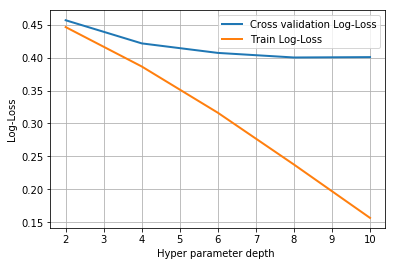

In [0]:
import matplotlib.pyplot as plt
plt.plot(index, cv_logloss, linewidth=2)
plt.plot(index, train_logloss, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Hyper parameter depth ')
plt.ylabel('Log-Loss')
plt.legend(['Cross validation Log-Loss', 'Train Log-Loss'], loc='upper right')
plt.show()

### Select Max Depth as '5'

In [0]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 7

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[0]	train-logloss:0.684822	valid-logloss:0.685608
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615277	valid-logloss:0.623529
[20]	train-logloss:0.563327	valid-logloss:0.57776
[30]	train-logloss:0.52362	valid-logloss:0.543425
[40]	train-logloss:0.49241	valid-logloss:0.517331
[50]	train-logloss:0.468178	valid-logloss:0.496988
[60]	train-logloss:0.448375	valid-logloss:0.480686
[70]	train-logloss:0.432179	valid-logloss:0.467772
[80]	train-logloss:0.418644	valid-logloss:0.457313
[90]	train-logloss:0.40712	valid-logloss:0.448612
[100]	train-logloss:0.396944	valid-logloss:0.441513
[110]	train-logloss:0.388302	valid-logloss:0.435865
[120]	train-logloss:0.381432	valid-logloss:0.431402
[130]	train-logloss:0.374584	valid-logloss:0.427083
[140]	train-logloss:0.368785	valid-logloss:0.423734
[150]	train-logloss:0.363314	valid-logloss:0.420685
[160]	train-logloss:0.35916	vali

Total number of data points : 15000


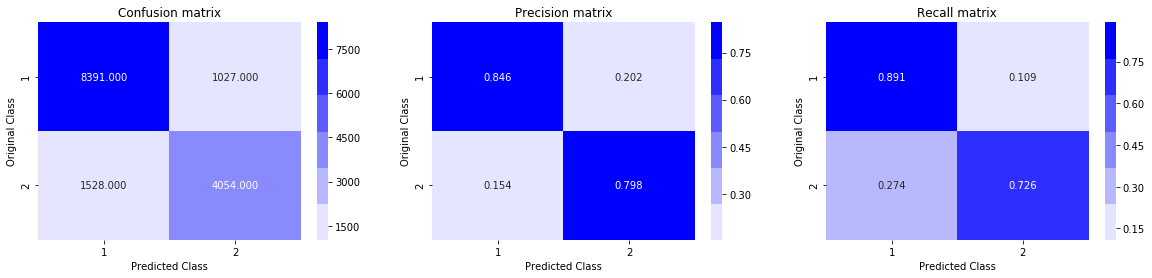

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.add_column("S.NO",[1,2,3])
x.add_column("Model Description",["XGBoost ","LR on TF-IDF "," linear SVM on TF-IDF"])
x.add_column("Hyperparameter value",["5 (depth)","0.1 (alpha)","1 (alpha)"])
x.add_column("Test Log Loss",["0.3936" ,"0.6444","0.6442" ])
print(x)

+------+-----------------------+----------------------+---------------+
| S.NO |   Model Description   | Hyperparameter value | Test Log Loss |
+------+-----------------------+----------------------+---------------+
|  1   |        XGBoost        |      5 (depth)       |     0.3936    |
|  2   |     LR on TF-IDF      |     0.1 (alpha)      |     0.6444    |
|  3   |  linear SVM on TF-IDF |      1 (alpha)       |     0.6442    |
+------+-----------------------+----------------------+---------------+
